<a href="https://colab.research.google.com/github/Pavan0-18/MLops/blob/main/MLops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv('/content/spam_Emails_data.csv')
print(data.head())

  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...


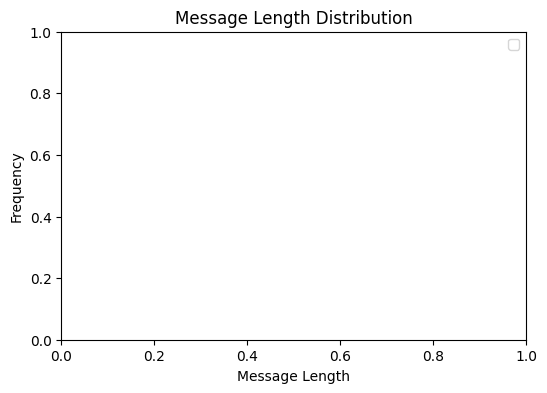

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data['message_length'] = data['text'].astype(str).apply(len)

# Visualize message length distribution
plt.figure(figsize=(6, 4))
sns.histplot(data[data['label'] == 0]['message_length'], color='blue', kde=True, label='Ham', bins=30)
sns.histplot(data[data['label'] == 1]['message_length'], color='red', kde=True, label='Spam', bins=30)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [7]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = data.dropna()
print(data.isnull().sum())


label    0
text     0
dtype: int64


In [15]:

data['clean_text'] = data['text'].apply(clean_text)
print(data[['text', 'clean_text']].head())


Empty DataFrame
Columns: [text, clean_text]
Index: []


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model1 = LogisticRegression()
model1.fit(X_train_tfidf, y_train)
y_pred = model1.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

         Ham       0.98      0.97      0.97     20317
        Spam       0.97      0.98      0.97     18453

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770

Accuracy: 0.97


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [9]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred))
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

              precision    recall  f1-score   support

         Ham       0.98      0.97      0.97     20317
        Spam       0.97      0.98      0.97     18453

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770

Naive Bayes Accuracy: 0.94


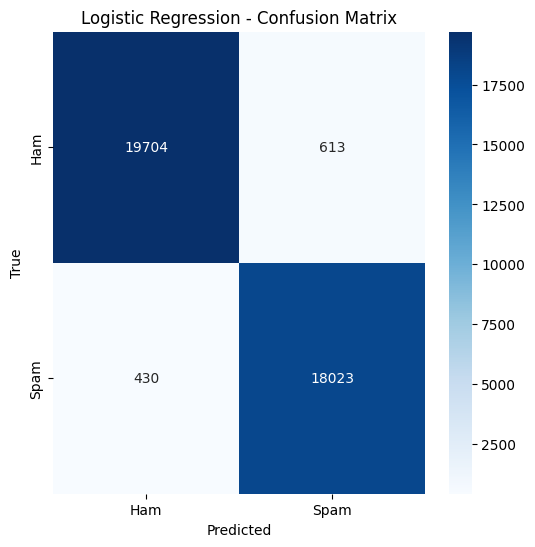

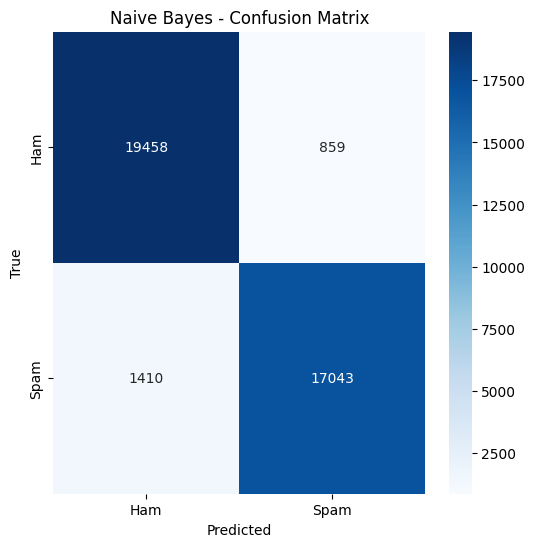

In [12]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')


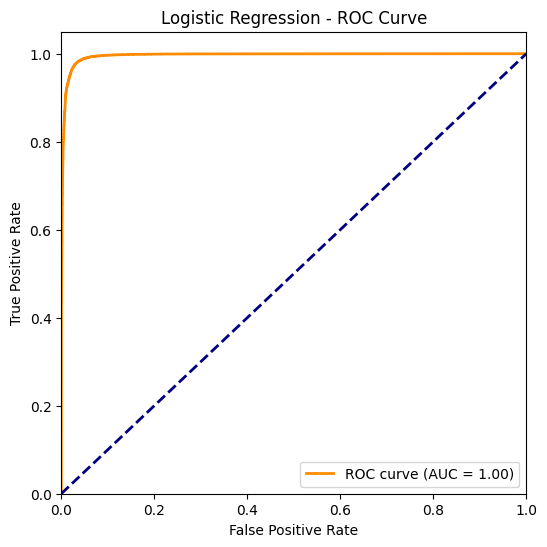

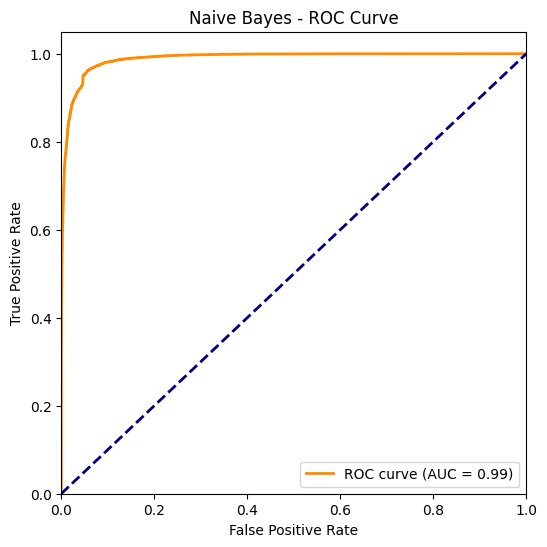

In [16]:

def plot_roc_curve(y_test, y_pred_prob, model_name):
    y_test = [1 if label == 'Spam' else 0 for label in y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
y_pred_prob_log_reg = model1.predict_proba(X_test_tfidf)[:, 1]
y_pred_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]
plot_roc_curve(y_test, y_pred_prob_log_reg, 'Logistic Regression')
plot_roc_curve(y_test, y_pred_prob_nb, 'Naive Bayes')



In [33]:
import joblib
joblib.dump(model1, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [34]:

model1 = joblib.load('spam_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example input
new_message = ["Congratulations! You've won a $1000 gift card."]
message_tfidf = vectorizer.transform(new_message)

# Predict
prediction = model1.predict(message_tfidf)
print("Prediction:", "Spam" if prediction == 1 else "Ham")

Prediction: Ham
